<a href="https://colab.research.google.com/github/Anas36/Fictional_Processor/blob/main/Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **- Imports**

In [31]:
#Starter Code
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray


# **- Opening Image**

In [32]:
def toArrayAndSquare(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] ** 2
  return img,sqr


In [33]:
image = Image.open("sample_image.jpg")
grayImage = image.convert('L')

img,sqr = toArrayAndSquare(grayImage)

# **integral Image**

In [34]:
def integralArray(Image):

    Nimage=np.array(Image)


    #Creating a new result numpy array
    result_s=np.zeros((Nimage.shape[0],Nimage.shape[1]))
    result_i=np.zeros((Nimage.shape[0],Nimage.shape[1]))

    #copy image value
    for i in range(0,Nimage.shape[0]):
        for j in range(0,Nimage.shape[1]):
            result_s[i][j] = Nimage[i][j]
            result_i[i][j] = Nimage[i][j]

    #Calculating s(i,j)
    for i in range(0,Nimage.shape[0]):
        for j in range(0,Nimage.shape[1]):
            if(j-1==-1):
                result_s[i][j]=0+Nimage[i][j]
            else :
                result_s[i][j]=result_s[i][j-1]+Nimage[i][j]

    #Calculating ii(i,j)
    for i in range(0,result_s.shape[0]):
        for j in range(0,result_s.shape[1]):
            if(i-1==-1):
                result_i[i][j]=0+result_s[i][j]
            else :
                result_i[i][j]=result_i[i-1][j]+result_s[i][j]

    return result_i

# **Local Sum**

In [35]:
def localSum(Image, leftI,leftJ ,rightI,rightJ):
  sum = 0
  #topLeft
  topLeft = Image[leftI - 1][leftJ - 1]
  #downLeft
  downLeft = Image[rightI][leftJ - 1]
  #topRight
  topRight = Image[leftI - 1][rightJ]
  #topLeft
  downRight = Image[rightI][rightJ]

  
  sum = downRight +  topLeft - downLeft - topRight

  return sum


# **Imgage With Integral**

In [36]:
def imgWithIntegral(grayImage,width,height):
  img,sqr = toArrayAndSquare(grayImage)
  IntegralImage = integralArray(img)
  IntegralImageSqr = integralArray(sqr)

  N = width * height
  Nimage=np.zeros((grayImage.size[1],grayImage.size[0]))

  for i in range(1, Nimage.shape[0]-width + 1):
      for j in range(1, Nimage.shape[1]-height +1):
            leftI = i
            leftJ = j
            rightI = width + i - 1
            rightJ = height + j -1
            middleI = leftI + 1 #int((leftI + rightI)/2)
            middleJ = j + 1 #int((leftJ + rightJ)/2)
            localSumImg = localSum(IntegralImage,leftI,leftJ,rightI,rightJ)
            localSumSqrImg = localSum(IntegralImageSqr,leftI,leftJ,rightI,rightJ)
            Var = ((1/N) * localSumSqrImg) - (((1/N) * localSumImg)**2)
            if(Var < 0 ):
              Var = 0
            Nimage[middleI][middleJ] = Var
  return Nimage   

# **threshold**

In [37]:
def applyThreshold (im, th):
  res = [[0 for x in range(len(im[0]))] for y in range(len(im))]
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      if(im[i][j]<th):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return res

# **Plotting**

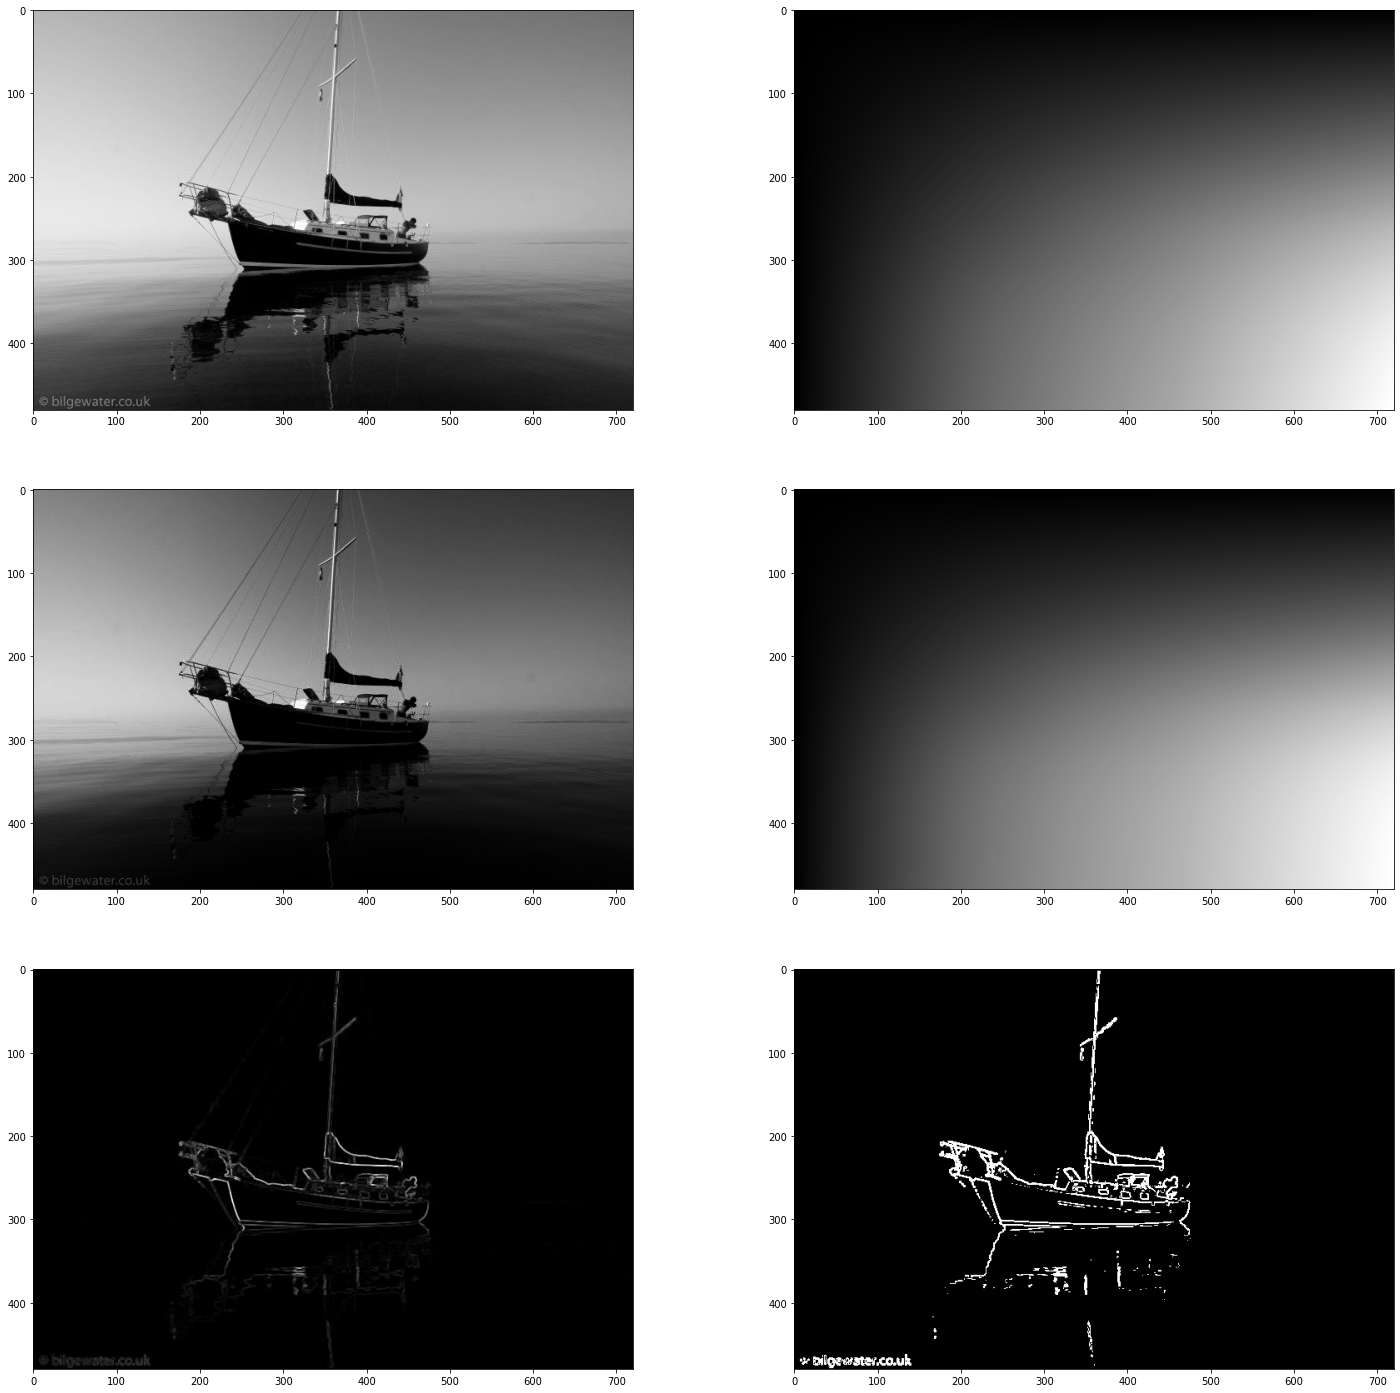

In [38]:
#plt has to be imported, see the previous sections


image2 = integralArray(img)
image4 = integralArray(sqr)
image5 = imgWithIntegral(grayImage,3,3)
image6 = applyThreshold(image5,750)
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))




plt.subplot(3,2,1)
plt.imshow(img,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(image2,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(sqr,  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(image4,  cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(image5,  cmap = 'gray')

plt.subplot(3,2,6)
plt.imshow(image6,  cmap = 'gray')

